## Message to Dalvi Sir,
The entire top code remains the same, the last few executable box is the version I am working on. You can directly go there. I haven't made any significant changes in the rest of the code. 

I have imported 'seaborn' which is installed in my local directory. I would request to uncomment the import if it is not installed in your machine. It is in the first executable box. 


## Fitting Kinetics

## Introduction
We have been given an assignment to improve the productivity of a particular process.  The heart of the process is a reaction where the raw materials A and B give rise to the products C and D.  The reaction scheme is as follows:
$$
    A + B \rightarrow C   
$$
$$
    A + C \rightarrow D
$$
$$
   B \rightarrow degradation
$$
The first two reactions are irreversible and of 1st order wrt each reactant.  The last reaction is <i>second</i> order wrt B.  The kinetic constants are $k_1, k_2, k_3$.

To get an idea of the kinetics, you commissioned a set of experiments in an isothermal batch reactor.  The experiments involve taking a known quantity of reactant A in a batch reactor and adding B to it semi-batchwise at a rate $R$.  The molar density of all components (including degradation products) is approximately the same at $\rho = 50 kmol/m^3$.

If the initial quantity of A is $N_{A0}$, write down differential equations with boundary conditions that govern the conversion of A, B, C and D.

$$
    N_A(t+\Delta t) - N_A(t) = V(-r_1 - r_2)\Delta t \rightarrow \frac{dN_A}{dt} = V(-r_1-r_2)
$$
Similarly:
$$
    \frac{dN_B}{dt} = V(-r_1-r_3) + R
$$
$$
    \frac{dN_C}{dt} = V(r_1 - r_2)
$$
$$
    \frac{dN_D}{dt} = V(r_2)
$$
$$
    \frac{dV}{dt} = \frac{R}{\rho}
$$
The boundary conditions are: 
$$
    \left[ N_A, N_B, N_C, N_D \right]_{t=0} = \left[ N_{A0}, 0, 0, 0 \right]
$$
Where, $r_1$, $r_2$, $r_3$ are the volumetric rates of the three reactions.
$$
    r_1 = k_1C_AC_B
$$
$$
    r_2 = k_2C_AC_C
$$
$$
    r_3 = k_3C_B^2
$$
And, $\left[ C_A, C_B, C_C \right] = \left[ \frac{N_A}{V}, \frac{N_B}{V}, \frac{N_C}{V}  \right]$.


Using data from the file "ExamProblemData.csv" fit the kinetic constants $k_1, k_2, k_3$ for each temperature.  The data headers are as follows:  Col1, Col2, Col3 are the time (s), $C_A, C_D$ for T=250K.  Col4, Col5, Col6 are for T=300K.  Col7, Col8, Col9 are for T=350K and Col10, Col11, Col12 are for T=400K.  Concentrations are in kmol/m3, $N_{A0} = 100 kmol$ and $R = 1$ kmol/$m^3$.  (If you are thinking "my what a big reactor!", consider this a pilot scale study.) 


Lets get the data first.  We will need to import pandas.  Lets import scipy while we are at it.  


In [10]:
import scipy
import pandas as pd
import seaborn as sn


Great.  But this Col1, Col2 business is confusing.  Lets give a descriptive header. Hence Col1 is to be renamed t_250, Col2 will be C_A_250, Col3 C_D_250 etc.  

In [3]:
headers = ['t_250', 'C_A_250', 'C_D_250', 't_300', 'C_A_300', 'C_D_300', 't_350', 'C_A_350', 'C_D_350', 't_400', 'C_A_400', 'C_D_400']
df = pd.read_csv("ExamProblemData.csv",  #The name of the csv file
                 header = 0,             #We are saying that the first line of the data is the headers
                 names = headers         #We are supplying our own headers (not using the names in the file)
                 )     

It worked!  Lets take a look.

In [4]:
df

,t_250,C_A_250,C_D_250,t_300,C_A_300,C_D_300,t_350,C_A_350,C_D_350,t_400,C_A_400,C_D_400
0,0.0,49.44,0.00,0.0,50.35,0.00,0.0,50.40,0.00,0.0,49.96,0.00
1,9.0,41.17,1.14,9.0,40.85,0.35,7.0,42.32,1.63,7.0,42.02,3.10
2,18.0,33.54,0.88,18.0,31.22,3.67,14.0,35.43,2.74,14.0,33.86,5.77
3,26.0,27.54,3.44,27.0,23.70,5.65,20.0,27.06,5.30,20.0,26.24,6.75
4,35.0,20.96,4.13,35.0,17.60,6.18,27.0,22.22,7.43,27.0,19.92,8.47
5,44.0,14.93,4.48,44.0,13.01,7.34,35.0,16.49,9.47,35.0,14.70,11.36
6,53.0,10.02,4.75,53.0,7.37,9.28,40.0,11.26,10.64,40.0,9.56,11.78
7,62.0,7.71,5.57,62.0,3.44,7.75,46.0,7.23,10.58,46.0,4.87,12.32
8,71.0,4.80,4.75,70.0,1.65,8.55,53.0,4.54,10.83,53.0,2.62,12.43
9,80.0,1.88,5.80,80.0,0.35,8.71,60.0,2.36,11.00,60.0,0.54,14.19


Wow!  Can't wait to plot!

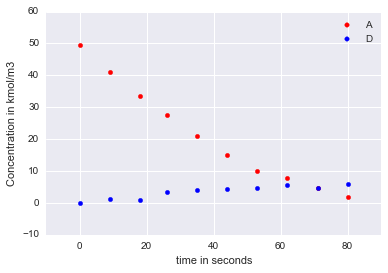

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline  
fig = plt.figure(); ax = fig.add_subplot(111)
ax.scatter(df.t_250, df.C_A_250, color="red",label="A")
ax.scatter(df.t_250, df.C_D_250, color = "blue",label="D")
ax.xaxis.label.set_text("time in seconds")
ax.yaxis.label.set_text("Concentration in kmol/m3")
plt.legend()
fig.canvas.draw()

Looking good.  You can always go back and to the cell and re-run for a different temperature.  Try it now ...

Moving on ...

Now there is one general way of tackling this problem.  We could set up and solve the ordinary differential equations using guesses of $k_1, k_2, k_3$ for each temperature.  For that we have to code in the model.  So lets do that.  

#### Reaction Model

In [12]:
def reaction_model(N, t, kinetic_constants, R, rho):
    [NA, NB, NC, ND, V] = N  #note the presence of V in the list

    [k1, k2, k3] = kinetic_constants
    
    CA, CB, CC, CD = NA/V, NB/V, NC/V, ND/V
    
    r1 = k1*CA*CB
    r2 = k2*CA*CC
    r3 = k3*CB*CB
    
    dNAbydt = V*(-r1 - r2)
    dNBbydt = V*(-r1 - r3) + R
    dNCbydt = V*( r1 - r2)
    dNDbydt = V*( r2)
    dVbydt  = R/rho
    
    return [dNAbydt, dNBbydt, dNCbydt, dNDbydt, dVbydt]
  

Now, since we anticipate having to call this for four different cases, it is good to write reusable code.  Hence classes ...
#### Experimental Run Class

In [13]:
import scipy.integrate

In [14]:
class ExperimentalRun:
    def __init__(self, df, T):
        time = 't_'+str(T)
        C_A = 'C_A_'+str(T)
        C_D = 'C_D_'+str(T)  #See the trick here?
        self.t = df[time]
        self.CA = df[C_A]
        self.CD = df[C_D]

        ## Data ##
        self.NA0 = 100.0 #kmol
        self.R = 1.0 #kmol/s
        self.rho = 50.0 #kmol/s
        self.V0 = self.NA0/self.rho
        
        ## Guess ##
        self.k = [0.05, 0.005, 0.0005]  #Just some random guesses (Not really!  After some trial and error :) ).  
        
    def solve(self, t = -1, N0 = -1):
        if t == -1:
            t = self.t
            N0 = [self.NA0, 0, 0, 0, self.V0]
        
            
        self.N = scipy.integrate.odeint(reaction_model, N0, t, args=(self.k, self.R, self.rho))
        self.CA_calc = self.N[:,0]/self.N[:,-1]
        self.CB_calc = self.N[:,1]/self.N[:,-1]
        self.CC_calc = self.N[:,2]/self.N[:,-1]
        self.CD_calc = self.N[:,3]/self.N[:,-1]
    
    def plot(self):
        fig = plt.figure(); ax = fig.add_subplot(111)
        ax.scatter(self.t, self.CA, color="red", label = "C_A experimental")
        ax.plot(self.t, self.CA_calc, color = "red", label = "C_A calculated")
        
        ax.scatter(self.t, self.CD, color="blue", label = "C_D experimental")
        ax.plot(self.t, self.CD_calc, color = "blue", label = "C_D calculated")
        
        ax.xaxis.label.set_text("time in seconds")
        ax.yaxis.label.set_text("concentration in kmol/m3")
        ax.legend()
        fig.canvas.draw()
        self.ax = ax


Lets see if it works.

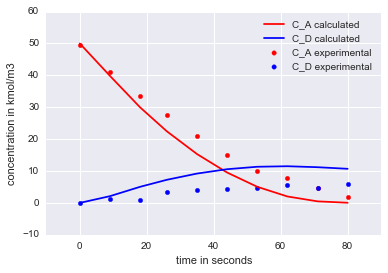

In [15]:
exp250 = ExperimentalRun(df, '250')
exp250.solve()
exp250.plot()   # Just marvel at the convenience!

Bad, but not too bad.  The value of $k_3$ appears to be a trifle high: too much D is being produced.  Anyhow, lets leave that calculation to the machine.  

We now have to <i>fit</i> the data.

In [16]:
import scipy.optimize  #Our favourite fitting library

For a given experimental run, define an error.

In [17]:
def error_exp(kinetic_constants, exprun):
    exprun.k = kinetic_constants
    exprun.solve()
    errA = exprun.CA_calc - exprun.CA
    errD = exprun.CD_calc - exprun.CD
    err = scipy.concatenate((errA, errD))
    return err
    

Lets try it out.

In [18]:
error_exp(exp250.k, exp250)
import scipy.optimize

Works ok.  Moving on ...

Lets do something a little different.  Lets modify the class ExperimentalRun to include fitting.  But let not go up and change it.  Lets <i>inherit</i> that class and modify this <i>child</i> class. 

In [19]:
class ExperimentalRunFit(ExperimentalRun):  #Heads up!  The class declaration just took an argument!
    def __init__(self, df, T):
        ExperimentalRun.__init__(self, df, T) #We now have everything that the class ExperimenalRun would have. See below.
    def fit(self): #We are adding a method attribute that does not exist in ExperimentalRun class.         
        (kopt, kcov, infodict, errmsg, ier) = scipy.optimize.leastsq(error_exp, self.k, args = (self,), full_output = 1)
        self.k = kopt
        self.kcov = kcov
        self.kerr = scipy.sqrt(scipy.diag(kcov))

    def get_confidence_intervals(self):
        self.solve()
        CA, CB, CC, CD = self.CA_calc, self.CB_calc, self.CC_calc, self.CD_calc
        listdCA, listdCB, listdCC, listdCD = [], [], [], []
        for i in xrange(len(self.k)):
            k = self.k[i]
            dk = abs(k)/1e6 + 1e-20
            self.k[i] = self.k[i] + dk
            self.solve()
            CAi, CBi, CCi, CDi = self.CA_calc, self.CB_calc, self.CC_calc, self.CD_calc
            dCA = (CAi - CA)/dk
            dCB = (CBi - CB)/dk
            dCC = (CCi - CC)/dk
            dCD = (CDi - CD)/dk
            listdCA.append(dCA)
            listdCB.append(dCB)
            listdCC.append(dCC)
            listdCD.append(dCD)
            self.k[i] = self.k[i] - dk
        errA = get_errY(listdCA, self.kcov)
        errB = get_errY(listdCB, self.kcov)
        errC = get_errY(listdCC, self.kcov)
        errD = get_errY(listdCD, self.kcov)
        self.solve()
        return 1.96*errA, 1.96*errB, 1.96*errC, 1.96*errD
    
    def plot_error(self):
        self.plot()
        ax = self.ax
        errA, errB, errC, errD = self.get_confidence_intervals()
        ax.fill_between(self.t, self.CA_calc-errA, self.CA_calc+errA, color="#ff0000",alpha = 0.2)
        ax.fill_between(self.t, self.CD_calc-errD, self.CD_calc+errD, color="#0000ff",alpha = 0.2)
        ax.figure.canvas.draw()
        print "k1 = %.2e (%.2e), k2 = %.2e (%.2e), k3 = %.2e (%.2e)"%(self.k[0],self.kerr[0]*1.96, self.k[1],self.kerr[1]*1.96, self.k[2],self.kerr[2]*1.96)
        
        
        
def get_errY(listdY, pcov):
    listdY = scipy.array(listdY)
    left = scipy.dot(listdY.T, pcov)
    right = scipy.dot(left, listdY)
    sigma2Y = right.diagonal()
    sigmaY = scipy.sqrt(sigma2Y)
    errY = 1.96*sigmaY
    return errY

Alright, lets try it out!

k1 = 1.79e-01 (2.51e+00), k2 = 6.99e-04 (1.92e-04), k3 = 1.04e+00 (3.26e+01)


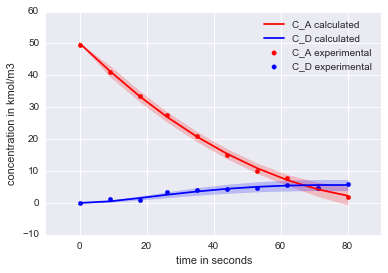

In [20]:
exp250 = ExperimentalRunFit(df, '250')
exp250.k = [0.05, 0.0006, 0.000]
exp250.fit()
exp250.plot_error()

#### Note of the fit
So our fits are good but look at the error estimates!  Horrible!  This is because we are estimating the behaviour of 4 concentrations using measurement for only two.  The system is in some way over-defined i.e. you can have several sets of k1, k2 and k3 to fit the data.  In other words, k1, k2 and k3 are correlated with each other i.e. we could have fitted the model with <i>fewer</i> parameters.  From the bad error estimates on k1 and k3, it is probable that these are correlated.  So we should get better estimated by setting k3 = 0.  

Lets just try it:

In [21]:
def error_exp(kinetic_constants, exprun):
    exprun.k = [kinetic_constants[0], kinetic_constants[1], 0.0]  #k3 is always zero.
    exprun.solve()
    errA = exprun.CA_calc - exprun.CA
    errD = exprun.CD_calc - exprun.CD
    err = scipy.concatenate((errA, errD))
    return err

class ExperimentalRunNewModel(ExperimentalRunFit):
    def __init__(self, df, T):
        ExperimentalRunFit.__init__(self,df, T)
        self.Temp = T
    def fit(self): #We are modifying a method attribute of ExperimentalRunFit class    
        k = [self.k[0], self.k[1]]
        (kopt, kcov, infodict, errmsg, ier) = scipy.optimize.leastsq(error_exp, k, args = (self,), full_output = 1)
        self.k = [kopt[0], kopt[1], 0.0]
        self.kcov = kcov
        self.kerr = scipy.sqrt(scipy.diag(kcov))   
        
    def get_confidence_intervals(self):
        self.solve()
        CA, CB, CC, CD = self.CA_calc, self.CB_calc, self.CC_calc, self.CD_calc
        listdCA, listdCB, listdCC, listdCD = [], [], [], []
        for i in [0,1]:
            k = self.k[i]
            
            dk = abs(k)/1e6 + 1e-20
            self.k[i] = self.k[i] + dk
            self.solve()
            CAi, CBi, CCi, CDi = self.CA_calc, self.CB_calc, self.CC_calc, self.CD_calc
            dCA = (CAi - CA)/dk
            dCB = (CBi - CB)/dk
            dCC = (CCi - CC)/dk
            dCD = (CDi - CD)/dk
            listdCA.append(dCA)
            listdCB.append(dCB)
            listdCC.append(dCC)
            listdCD.append(dCD)
            self.k[i] = self.k[i] - dk
        errA = get_errY(listdCA, self.kcov)
        errB = get_errY(listdCB, self.kcov)
        errC = get_errY(listdCC, self.kcov)
        errD = get_errY(listdCD, self.kcov)
        self.solve()
        return 1.96*errA, 1.96*errB, 1.96*errC, 1.96*errD
    
    def plot_error(self):
        self.plot()
        ax = self.ax
        errA, errB, errC, errD = self.get_confidence_intervals()
        ax.fill_between(self.t, self.CA_calc-errA, self.CA_calc+errA, color="#ff0000",alpha = 0.2)
        ax.fill_between(self.t, self.CD_calc-errD, self.CD_calc+errD, color="#0000ff",alpha = 0.2)
        ax.title.set_text("Plots for T = %s K"%(self.Temp))
        ax.figure.canvas.draw()
        #print "k1 = %.2e (%.2e), k2 = %.2e (%.2e)"%(self.k[0],self.kerr[0]*1.96, self.k[1],self.kerr[1]*1.96)
        return self.k[0],self.k[1]
        
        

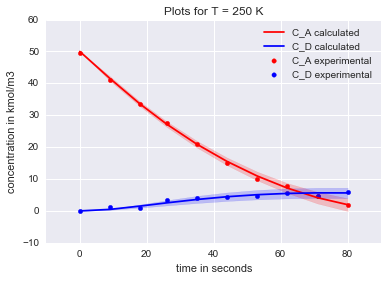

In [22]:
k_value=[]
exp250 = ExperimentalRunNewModel(df, '250')
exp250.k = [0.05, 0.0006, 0.000]
exp250.fit()
k_value.append(exp250.plot_error())


Well is better than before!

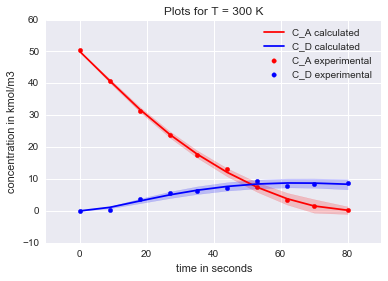

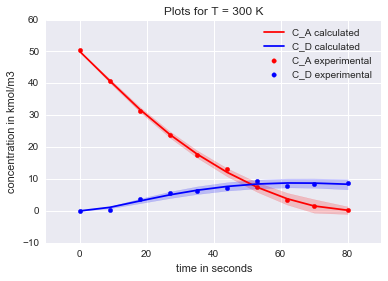

In [23]:
exp300 = ExperimentalRunNewModel(df, '300')
exp300.k = [0.05, 0.0006, 0.000]
exp300.fit()
exp300.plot_error()
k_value.append(exp300.plot_error())

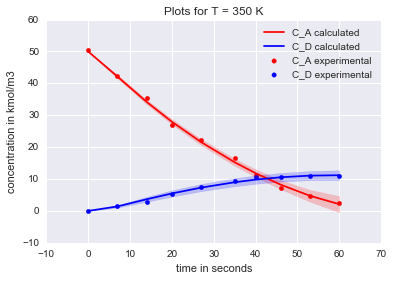

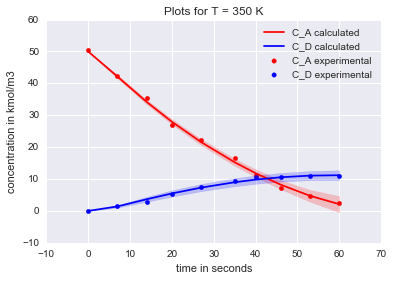

In [24]:
exp350 = ExperimentalRunNewModel(df, '350')
exp350.k = [0.05, 0.0006, 0.000]
exp350.fit()
exp350.plot_error()
k_value.append(exp350.plot_error())

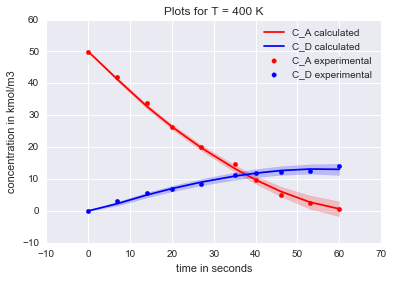

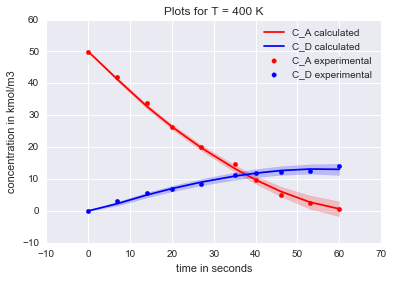

In [25]:
exp400 = ExperimentalRunNewModel(df, '400')
exp400.k = [0.05, 0.0006, 0.000]
exp400.fit()
exp400.plot_error()
k_value.append(exp400.plot_error())

# Homework
Get the Arrhenius constants for $k_1$ and $k_2$ along with their confidence intervals.  Plot the Arrhenius plot with the 95% confidence interval.  

This will prove to you that you have understood this lesson.  If you find it hard, you should try to go through this notebook again.  

_________________________________________________
---------
Solution:
---------
Arrehnius Constant for k1 = 2.45e+00 (1.53e-07)
Ea for k1 = 8.47e+03 (1.89e-04),

Arrehnius Constant for k2 = 4.87e+00 (1.25e-05)
Ea for k2 = 2.02e+04 (8.31e-03)
_________________________________________________


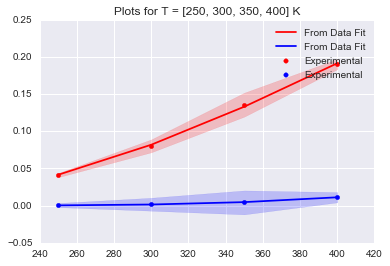

In [42]:
temp=[250,300,350,400]
fig = plt.figure(); ax = fig.add_subplot(111)
a,b=zip(*k_value)
k1,k2=a,b
ax.scatter(temp,a,color='red',label="Experimental")
ax.scatter(temp,b,color='blue',label="Experimental")
R=8.314 # J/K
def arr_model(A,Ea,T):
    k1_calc=[]
    k2_calc=[]
    for i in T:
        k1_calc.append(A[0]*scipy.exp(-Ea[0]/(R*i)))
        k2_calc.append(A[1]*scipy.exp(-Ea[1]/(R*i)))
    return k1_calc,k2_calc
    
k1_calc,k2_calc=[],[]

def errors(par,temp,k):
    A=[par[0],par[1]]
    Ea=[par[2],par[3]]
    k1,k2=k
    k1_calc,k2_calc=arr_model(A,Ea,temp)
    k1_calc=scipy.array(k1_calc)
    k2_calc=scipy.array(k2_calc)
    k1=scipy.array(k1)
    k2=scipy.array(k2)
    err_k1=(k[0]-k1_calc)*10e8
    err_k2=(k[1]-k2_calc)*10e8
    return scipy.concatenate((err_k1,err_k2))

def get_errY(listdY, pcov):
    listdY = scipy.array(listdY)
    left = scipy.dot(listdY.T, pcov)
    right = scipy.dot(left, listdY)
    sigma2Y = right.diagonal()
    sigmaY = scipy.sqrt(sigma2Y)
    errY = 1.96*sigmaY
    return errY

paropt, parcov, infodict, errmsg, ier=scipy.optimize.leastsq(errors,[[0.1,0.1],[1000,1000]],args=(temp,[k1,k2]), full_output = 1)
k1_opt,k2_opt=arr_model([paropt[0],paropt[1]],[paropt[2],paropt[3]],temp)
ax.plot(temp,k1_opt,color='red',label="From Data Fit")
ax.plot(temp,k2_opt,color='blue',label="From Data Fit")

def get_confidence_intervals(paropt,k):
    k1, k2= k
    k1=scipy.array(k1)
    k2=scipy.array(k2)
    listdk1, listdk2 = [], []
    
    for i in [0,1,2,3]:
        k = paropt[i]
        dk = abs(k)/1e6 + 1e-20
        paropt[i] = paropt[i] + dk
        k1_calc,k2_calc=arr_model([paropt[0],paropt[1]],[paropt[2],paropt[3]],temp)
        k1i, k2i = k1_calc,k2_calc
        k1i=scipy.array(k1i)
        k2i=scipy.array(k2i)
        
        dk1 = (k1i - k1)/dk
        dk2 = (k1i - k1)/dk
        
        listdk1.append(dk1)
        listdk2.append(dk2)
        paropt[i] = paropt[i] - dk
        
    errA = get_errY(listdk1, parcov)
    errB = get_errY(listdk2, parcov)

    return 1.96*errA, 1.96*errB

def plot_error(temp,k1,k2):
    
    errA, errB = get_confidence_intervals(paropt,[k1,k2])
    ax.fill_between(temp, k1-errA, k1+errA, color="#ff0000",alpha = 0.2)
    ax.fill_between(temp, k2-errB, k2+errB, color="#0000ff",alpha = 0.2)
    ax.title.set_text("Plots for T = %s K"%(temp))
    ax.figure.canvas.draw()
    
    #print "k1 = %.2e (%.2e), k2 = %.2e (%.2e)"%(self.k[0],self.kerr[0]*1.96, self.k[1],self.kerr[1]*1.96)
    
plot_error(temp,k1,k2)
plt.legend()
print "_________________________________________________"
print "---------"
print "Solution:"
print "---------"
kerr = scipy.sqrt(scipy.diag(parcov))   
print "Arrehnius Constant for k1 = %.2e (%.2e)\nEa for k1 = %.2e (%.2e),\n\nArrehnius Constant for k2 = %.2e (%.2e)\nEa for k2 = %.2e (%.2e)"\
        %(paropt[0],kerr[0]*1.96, paropt[2],kerr[2]*1.96, paropt[1],kerr[1]*1.96,paropt[3],kerr[3]*1.96)
print "_________________________________________________"

